[View in Colaboratory](https://colab.research.google.com/github/kintarou/django-starter/blob/master/sklearn_iris.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [3]:
iris.data[:10, :]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [4]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

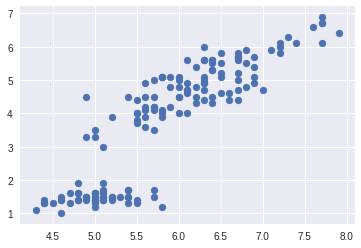

In [5]:
x = iris.data[:, 0]
y = iris.data[:, 2]
plt.scatter(x, y)

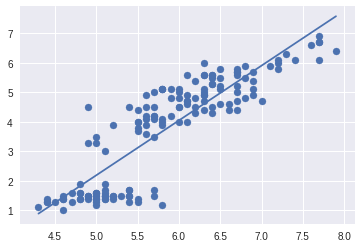

In [8]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(iris.data[:, 0].reshape(-1, 1), iris.data[:, 2])
xmin = x.min()
xmax = x.max()

def f(t): 
  return model.coef_[0] * t + model.intercept_

plt.plot([xmin, xmax], [f(xmin), f(xmax)])
plt.scatter(x, y)

In [9]:
model.predict(6.5)

array([4.97843135])

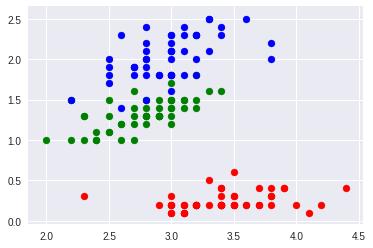

In [10]:
training_data = iris.data[:, [1, 3]]
target = iris.target
for i, color in enumerate("rgb"):
    plt.scatter(training_data[target == i, 0],
                training_data[target == i, 1], color=color)

In [11]:
from sklearn import svm

model = svm.SVC()
model.fit(training_data, target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

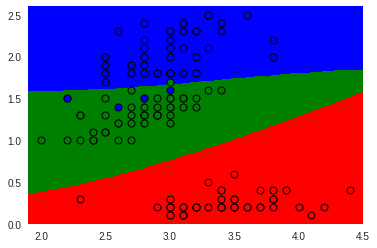

In [12]:
xmin = training_data[:, 0].min()
xmax = training_data[:, 0].max()
ymin = training_data[:, 1].min()
ymax = training_data[:, 1].max()
xs = np.linspace(xmin - 0.1, xmax + 0.1, 300)
ys = np.linspace(ymin - 0.1, ymax + 0.1, 300)
xmesh, ymesh = np.meshgrid(xs, ys)
plt.contourf(xmesh, ymesh, model.predict(np.c_[xmesh.ravel(), ymesh.ravel()]).reshape(xmesh.shape),
             levels=[-0.5, 0.5, 1.5, 2.5, 3.5], colors=["r", "g", "b"])
for i, color in zip(range(3), "rgb"):
    plt.scatter(training_data[target == i, 0],
                training_data[target == i, 1], color=color, linewidth=1, edgecolor="k", marker="o")

In [13]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((120, 4), (120,), (30, 4), (30,))

In [14]:
model = svm.SVC()
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
model.score(X_test, y_test)

1.0

In [16]:
model = svm.SVC()
scores = model_selection.cross_val_score(model, iris.data, iris.target, cv=5)
scores, scores.mean()

(array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ]),
 0.9800000000000001)

In [17]:
from sklearn import cluster
training_data = iris.data[:, [1, 2]]
model = cluster.KMeans(n_clusters=4)
model.fit(training_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [18]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 3, 3, 1, 3, 3, 3, 1, 3, 1, 1, 1, 1, 3, 1, 3,
       3, 1, 1, 1, 3, 1, 3, 3, 1, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       3, 3, 2, 3, 3, 3, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 2, 3], dtype=int32)

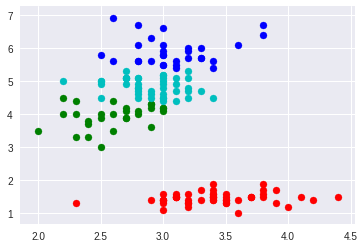

In [19]:
for i, c in enumerate("rgbc"):
    data = training_data[model.labels_ == i, :]
    plt.scatter(data[:, 0], data[:, 1], color=c)

In [20]:
from sklearn import decomposition
model = decomposition.PCA(n_components=2)
model.fit(iris.data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [0]:
compressed = model.transform(iris.data)

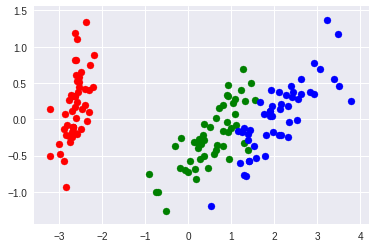

In [22]:
for i, c in enumerate("rgb"):
    plt.scatter(compressed[iris.target == i, 0],compressed[iris.target == i, 1], color=c)

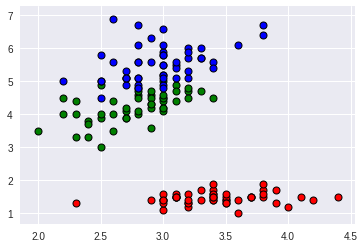

In [27]:
xmin = training_data[:, 0].min()
xmax = training_data[:, 0].max()
ymin = training_data[:, 1].min()
ymax = training_data[:, 1].max()
xs = np.linspace(xmin - 0.1, xmax + 0.1, 300)
ys = np.linspace(ymin - 0.1, ymax + 0.1, 300)
xmesh, ymesh = np.meshgrid(xs, ys)
for i, color in zip(range(3), "rgb"):
    plt.scatter(training_data[target == i, 0],training_data[target == i, 1], color=color, linewidth=1, edgecolor="k", marker="o")